In [1]:
import pandas as pd
df1=pd.read_excel('UDJG_ADULT_CONS1.xls')
df2=pd.read_excel('UDJG_ADULT_CONS2.xls')
df3=pd.read_excel('UDJG_ADULT_CONS3.xls')
df4=pd.read_excel('UDJG_ADULT_CONS4.xls')
dataset2=pd.read_excel('UDJG_ADULT_FOODS.xls')
dataset3=pd.read_excel('UDJG_ADULT_SUBJ.xls')

dataset = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)
#dataset = pd.read_excel('UDJG_ADULT_CONS1.xls')

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import random
from collections import Counter
import numpy as np

In [3]:
columns_to_delete=['SURVEY', 'CONDAY', 'CONMONTH', 'CONYEAR', 'EXCEPTIONDAY', 'TIMEHOUR', 
                   'TIMEMINUTES', 'UNITMEAS', 'BRAND', 'ORFACETSCODE', 'ORFACETS', 'ENFACETS', 'PACKAGE', 'OFACETS', 'ORRECIPECODE', 
                   'ENRECIPEDESC', 'AMOUNTRECIPE', 'FPREP', 'FOODEXRCODE']
dataset=dataset.drop(columns=columns_to_delete, axis=1)


columns_to_delete2=['SURVEY', 'COMMENTSFOOD', 'ENERGY', 'WATER', 'FAT', 'CARB', 'PROTEINS', 'ALCOHOL', 'ENFOODNAME', 'FOODEXCODE']
dataset2=dataset2.drop(columns=columns_to_delete2, axis=1)

columns_to_delete3=['SURVEY', 'COUNTRY', 'BIRTHDAY', 'BIRTHMONTH', 'BIRTHYEAR', 'FANTYEAR', 'SWEIGHT', 'SHEIGHT', 'SANTDAY', 'SANTMONTH', 'SANTYEAR', 'MWEIGHT', 
                    'MHEIGHT', 'ENRGYINTAKE', 'UNOVREP', 'WF', 'SPECIALCON', 'SPECDIET', 'ACTIVITY', 'ETHNIC', 'FANTMONTH', 'FANTDAY',
                    'EDUCATION', 'COMMENTSSUBJECT']
dataset3=dataset3.drop(columns=columns_to_delete3, axis=1)

In [4]:
columns_to_check_duplicates = ['ORSUBCODE', 'DAY', 'WEEK', 'SEASON', 'MEAL', 'PLACE', 'EATSEQ']
condition_not_empty = dataset['ORRECIPEDESC'].notna()

dataset_no_duplicates = dataset[condition_not_empty].drop_duplicates(subset=columns_to_check_duplicates, keep='first')

In [5]:
dataset_no_duplicates.to_csv('test2.csv', index=False)

In [6]:
foodcode_to_recipe = dataset2.set_index('ORFOODCODE')['ORFOODNAME'].to_dict()

mask = pd.isna(dataset_no_duplicates['ORRECIPEDESC'])
dataset_no_duplicates.loc[mask, 'ORRECIPEDESC'] = dataset_no_duplicates.loc[mask, 'ORFOODCODE'].map(foodcode_to_recipe)

dataset_no_duplicates.insert(loc=11, column='GENDER', value='')
dataset_no_duplicates.insert(loc=12, column='AGE', value='')
dataset_no_duplicates.insert(loc=13, column='WEIGHT', value='')
dataset_no_duplicates.insert(loc=14, column='HEIGHT', value='')
dataset_no_duplicates.insert(loc=15, column='GEO', value='')


In [7]:
gender_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['GENDER']
age_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['AGE']
weight_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['WEIGHT']
height_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['HEIGHT']
geo_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['GEO']

dataset_no_duplicates.loc[:, 'GENDER'] = dataset_no_duplicates['ORSUBCODE'].map(gender_to_recipe)
dataset_no_duplicates.loc[:, 'AGE'] = dataset_no_duplicates['ORSUBCODE'].map(age_to_recipe)
dataset_no_duplicates.loc[:, 'WEIGHT'] = dataset_no_duplicates['ORSUBCODE'].map(weight_to_recipe)
dataset_no_duplicates.loc[:, 'HEIGHT'] = dataset_no_duplicates['ORSUBCODE'].map(height_to_recipe)
dataset_no_duplicates.loc[:, 'GEO'] = dataset_no_duplicates['ORSUBCODE'].map(geo_to_recipe)


In [8]:
dataset_no_duplicates.loc[:, 'WEEK'] = dataset_no_duplicates['WEEK'].str.replace('W', '').astype(int)
dataset_no_duplicates.loc[:, 'SEASON'] = dataset_no_duplicates['SEASON'].str.replace('S', '').astype(int)
dataset_no_duplicates.loc[:, 'MEAL'] = dataset_no_duplicates['MEAL'].str.replace('M', '').astype(int)
dataset_no_duplicates.loc[:, 'PLACE'] = dataset_no_duplicates['PLACE'].str.replace('P', '').astype(int)
dataset_no_duplicates.loc[:, 'GENDER'] = dataset_no_duplicates['GENDER'].str.replace('G', '').astype(int)
dataset_no_duplicates.loc[:, 'GEO'] = dataset_no_duplicates['GEO'].str.replace('RO', '').astype(int)

In [9]:
columns_to_delete=['ORFOODCODE', 'ORSUBCODE']
dataset_no_duplicates=dataset_no_duplicates.drop(columns=columns_to_delete, axis=1)


In [10]:
le = LabelEncoder()
#dataset['ORRECIPEDESC'] = le.fit_transform(dataset['ORRECIPEDESC'])
dataset_no_duplicates['ORRECIPEDESC_encoded'] = le.fit_transform(dataset_no_duplicates['ORRECIPEDESC'])

In [11]:
dataset_no_duplicates=dataset_no_duplicates.sample(frac=1, random_state=42)
dataset_no_duplicates.reset_index(drop=True, inplace=True)

In [12]:
def map_geo(value):
    if 111 <= value <= 116:
        return value // 10
    elif 121 <= value <= 126:
        return value // 10
    elif 211 <= value <= 216:
        return value // 10
    elif 221 <= value <= 226:
        return value // 10
    elif 311 <= value <= 316:
        return value // 10
    elif 321 <= value <= 326:
        return value // 10
    elif 411 <= value <= 416:
        return value // 10
    elif 421 <= value <= 426:
        return value // 10
    else:
        return value
    
dataset_no_duplicates['GEO'] = dataset_no_duplicates['GEO'].apply(map_geo)

In [13]:
interest = dataset_no_duplicates.iloc[:, [col for col in range(dataset_no_duplicates.shape[1]) if col != 6]].values
scaler = StandardScaler()
interest_z = scaler.fit_transform(interest)

In [14]:
random.seed(2345)

#kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300,random_state=42)
kmeans = KMeans(n_clusters=5)
kmeans.fit(interest_z)

kmeans.n_iter_
kmeans.cluster_centers_

dataset_no_duplicates['cluster'] = kmeans.labels_
Counter(dataset_no_duplicates['cluster'])

c:\Users\Silvian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Counter({1: 5802, 4: 5066, 2: 4987, 3: 4579, 0: 3183})

In [15]:
dataset_no_duplicates['BMI'] = np.ceil((dataset_no_duplicates['WEIGHT'] / (dataset_no_duplicates['HEIGHT'] / 100) ** 2) * 10) / 10
dataset_no_duplicates.head()

,DAY,WEEK,SEASON,MEAL,PLACE,EATSEQ,ORRECIPEDESC,AMOUNTFRAW,AMOUNTFCOOKED,GENDER,AGE,WEIGHT,HEIGHT,GEO,ORRECIPEDESC_encoded,cluster,BMI
0,6,6,3,7,3,1,prajitura de casa,30.000,30.000,2,41,60.0,168,11,619,4,21.3
1,4,4,5,3,3,1,supa de pasare,25.000,20.000,1,28,80.0,176,42,834,3,25.9
2,3,3,2,3,1,1,bors de sfecla rosie,300.000,150.000,1,42,92.0,182,21,19,2,27.8
3,3,3,5,5,3,1,musaca de vinete,79.285,59.463,1,45,88.0,180,31,430,3,27.2
4,3,3,3,5,3,1,macaroane cu urda,140.000,14.000,2,56,75.0,162,41,355,1,28.6


In [16]:
dataset_no_duplicates.groupby('cluster')['AGE'].mean()

cluster
0    47.236255
1    44.479317
2    47.563666
3    48.827692
4     44.91058
Name: AGE, dtype: object

In [17]:
dataset_no_duplicates.groupby('cluster')['ORRECIPEDESC'].first()

cluster
0          supa de legume
1       macaroane cu urda
2    bors de sfecla rosie
3          supa de pasare
4       prajitura de casa
Name: ORRECIPEDESC, dtype: object

In [18]:
dataset_no_duplicates.groupby('cluster')['BMI'].std()


cluster
0    4.087384
1    3.958678
2    3.943496
3    4.178709
4    4.068934
Name: BMI, dtype: float64

In [19]:
dataset_no_duplicates.groupby('cluster')['BMI'].var()

cluster
0    16.706711
1    15.671131
2    15.551162
3    17.461613
4    16.556225
Name: BMI, dtype: object

In [20]:
dataset_no_duplicates.groupby('cluster').agg({'AGE': 'mean', 'WEIGHT': 'median'})

,AGE,WEIGHT
cluster,,
0,47.236255,75.0
1,44.479317,64.0
2,47.563666,83.0
3,48.827692,84.0
4,44.91058,65.0


In [21]:
underweight_percentage = np.mean(dataset_no_duplicates['BMI'] < 18.5) * 100
normal_weight_percentage = np.mean((dataset_no_duplicates['BMI'] >= 18.5) & (dataset_no_duplicates['BMI'] < 25)) * 100
overweight_percentage = np.mean((dataset_no_duplicates['BMI'] >= 25) & (dataset_no_duplicates['BMI'] < 30)) * 100
obese1_percentage = np.mean((dataset_no_duplicates['BMI'] >= 30) & (dataset_no_duplicates['BMI'] < 35)) * 100
obese2_percentage = np.mean((dataset_no_duplicates['BMI'] >= 35) & (dataset_no_duplicates['BMI'] < 40)) * 100
obese3_percentage = np.mean(dataset_no_duplicates['BMI'] >= 40) * 100

print(f"Percentage of people underweight: {underweight_percentage:.2f}%")
print(f"Percentage of people with normal weight: {normal_weight_percentage:.2f}%")
print(f"Percentage of people overweight: {overweight_percentage:.2f}%")
print(f"Percentage of people with class 1 obesity: {obese1_percentage:.2f}%")
print(f"Percentage of people with class 2 obesity: {obese2_percentage:.2f}%")
print(f"Percentage of people with class 3 obesity: {obese3_percentage:.2f}%")

Percentage of people underweight: 1.80%
Percentage of people with normal weight: 42.88%
Percentage of people overweight: 39.44%
Percentage of people with class 1 obesity: 12.98%
Percentage of people with class 2 obesity: 2.52%
Percentage of people with class 3 obesity: 0.37%


In [22]:
# Gruparea datelor și calcularea frecvenței fiecărei rețete în fiecare cluster și GEO
popular_recipes = dataset_no_duplicates.groupby(['cluster', 'GEO'])['ORRECIPEDESC'].value_counts()

# Obținerea top 5 rețete pentru fiecare combinație de cluster și GEO
top5_recipes_per_cluster_geo = popular_recipes.groupby(level=[0, 1]).nlargest(5).reset_index(level=[0, 1], drop=True)

# Afișarea rezultatelor
top5_recipes_per_cluster_geo.to_csv('statistica.csv')

In [23]:
dataset_no_duplicates.to_csv('dataset.csv')

In [24]:
features = dataset_no_duplicates[['GEO', 'AGE', 'WEIGHT', 'HEIGHT', 'AMOUNTFRAW', 'AMOUNTFCOOKED', 'ORRECIPEDESC_encoded', 'BMI']]
k = 5  # replace with the optimal value from step 2

# Fit the k-means model
kmeans = KMeans(n_clusters=k, random_state=42)
dataset_no_duplicates['cluster'] = kmeans.fit_predict(features)

c:\Users\Silvian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


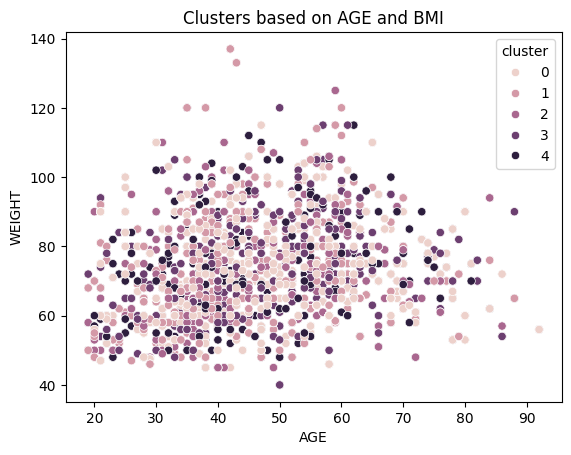

In [25]:
import seaborn as sns
# Example: Analyzing AGE and WEIGHT for each cluster
sns.scatterplot(x='AGE', y='WEIGHT', hue='cluster', data=dataset_no_duplicates)
plt.title('Clusters based on AGE and BMI')
plt.show()